## Importaciones

In [8]:
from skimage import color
from skimage.filters import threshold_otsu, sobel
from skimage.morphology import label, footprint_rectangle, opening, dilation, erosion
import skimage.filters as filters
import matplotlib.pyplot as plt
import numpy as np
import skimage.util as util

from skimage import exposure
import skimage

## Funciones

In [4]:
def comparar_images(imagen1, imagen2):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
  ax1.imshow(imagen1, cmap='gray')
  ax1.set_title('Imagen Original')
  ax1.axis('off')

  ax2.imshow(imagen2, cmap='gray')
  ax2.set_title('Imagen Procesada')
  ax2.axis('off')

  plt.show()

## Preparacion imagen

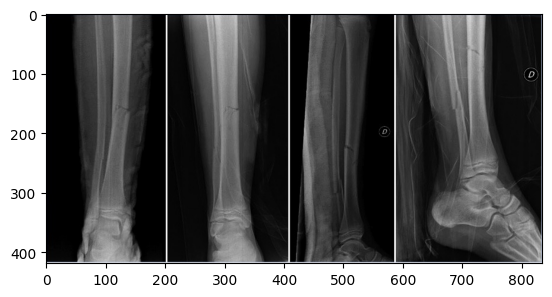

In [5]:
imagen  = plt.imread("./imgs/torus_3.jpg")
plt.imshow(imagen)

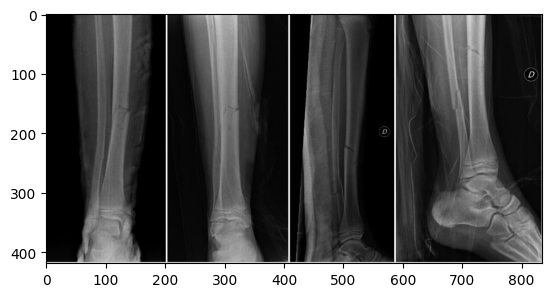

In [6]:
# Conversión a escala de grises
imagen_escalagris = color.rgb2gray(imagen)
plt.imshow(imagen_escalagris, cmap='gray')

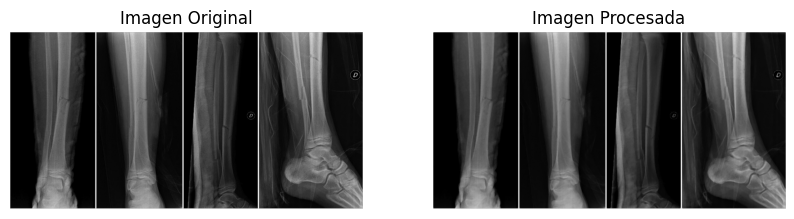

In [10]:
imagen_suavizada_median = filters.median(imagen_escalagris)
comparar_images(imagen_escalagris, imagen_suavizada_median)

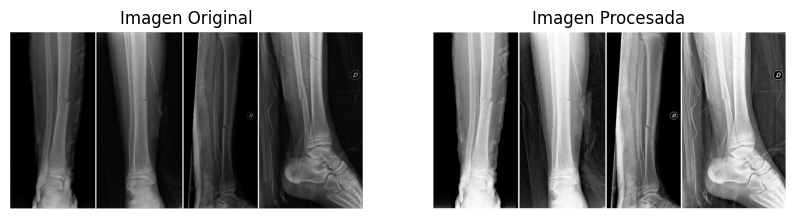

In [11]:
imagen_mejorada_hist = exposure.equalize_hist(imagen_escalagris)
comparar_images(imagen_escalagris, imagen_mejorada_hist)

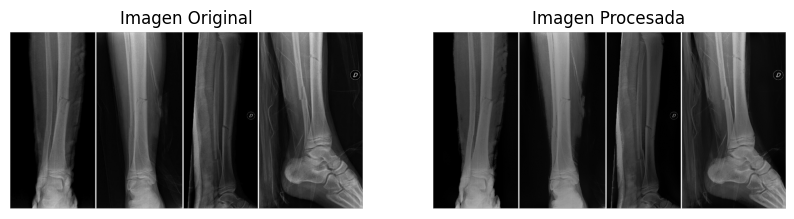

In [12]:
imagen_mejorada = skimage.restoration.denoise_bilateral(imagen_escalagris, sigma_color=0.05, sigma_spatial=15)
comparar_images(imagen_escalagris, imagen_mejorada)

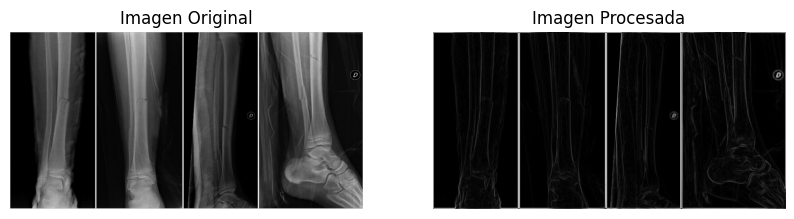

In [13]:
# Detectar bordes usando el filtro Sobel
bordes = skimage.filters.sobel(imagen_escalagris)
comparar_images(imagen_escalagris, bordes)

## Test

In [15]:
imagen_color = np.dstack([imagen_escalagris, imagen_escalagris, imagen_escalagris])

In [ ]:
enhanced_image = filters.unsharp_mask(imagen_escalagris, radius=3, amount=1)
comparar_images(imagen_escalagris, enhanced_image)

gradiente = dilation(imagen_escalagris, footprint_rectangle((3, 3))) - erosion(imagen_escalagris, footprint_rectangle((3, 3)))
comparar_images(imagen_escalagris, gradiente)

bordes_1 = filters.sobel(enhanced_image)
imagen_color[..., 2] += bordes_1
comparar_images(imagen_escalagris, imagen_color)

imagen_abierta = opening(enhanced_image, footprint_rectangle((3, 3)))
bordes_2 = filters.sobel(imagen_abierta)
imagen_color[..., 2] += bordes_2
comparar_images(imagen_escalagris, imagen_color)

# imagen_color[..., 2] += bordes_2
# comparar_images(imagen_escalagris, imagen_color)
plt.figure(figsize=(8, 6))
plt.imshow(bordes_2, cmap="Blues")  # "Blues" - "Greens" "Reds"
plt.axis("off")
plt.title("Bordes resaltados en azul")
plt.show()

plt.figure(figsize=(8, 6))
plt.imshow(bordes_2, cmap="Greens")  # "Blues" - "Greens" "Reds"
plt.axis("off")
plt.title("Bordes resaltados en azul")
plt.show()

plt.figure(figsize=(8, 6))
plt.imshow(bordes_2, cmap="Reds")  # "Blues" - "Greens" "Reds"
plt.axis("off")
plt.title("Bordes resaltados en azul")
plt.show()

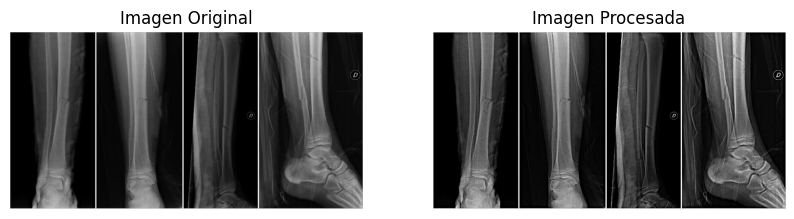

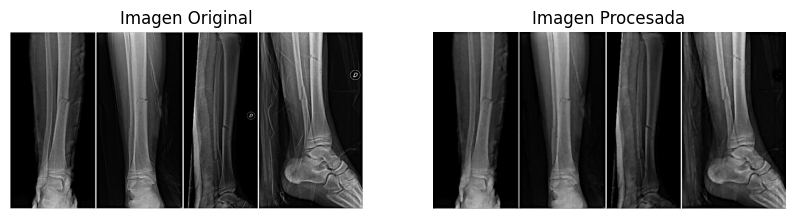

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..4.535533905932738].


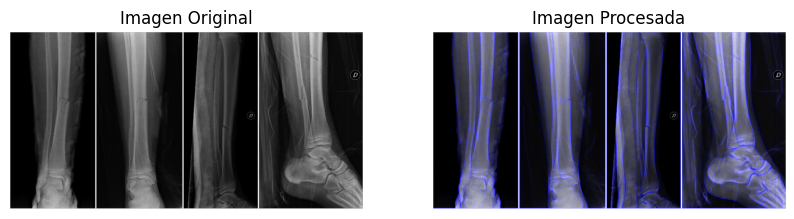

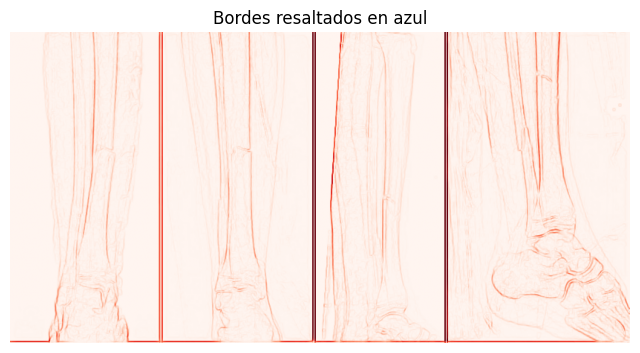

In [20]:
enhanced_image = filters.unsharp_mask(imagen_escalagris, radius=3, amount=1)
comparar_images(imagen_escalagris, enhanced_image)

imagen_abierta = opening(enhanced_image, footprint_rectangle((3, 3)))
comparar_images(enhanced_image, imagen_abierta)
bordes_imagen_abierta = filters.sobel(imagen_abierta)
imagen_color[..., 2] += bordes_imagen_abierta
comparar_images(imagen_escalagris, imagen_color)

plt.figure(figsize=(8, 6))
plt.imshow(bordes_imagen_abierta, cmap="Reds")  # "Blues" - "Greens" "Reds"
plt.axis("off")
plt.title("Bordes resaltados en azul")
plt.show()